In [1]:
import numpy as np
import torch 
src = torch.Tensor([[1,1,1],[2,3,0],[3,1,0]])
src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
print(src_mask)

tensor([[[[ True,  True,  True]]],


        [[[ True,  True, False]]],


        [[[ True,  True, False]]]])


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EXVy7_7pF5FIsPp6WfXXfWgBNfUKx8N1VrTisN8FbGYG9w?download=1 -O Flickr8k_dataset.zip

--2022-03-08 08:38:53--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EXVy7_7pF5FIsPp6WfXXfWgBNfUKx8N1VrTisN8FbGYG9w?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/datasets/Flickr8k_dataset.zip [following]
--2022-03-08 08:38:54--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/datasets/Flickr8k_dataset.zip
Reusing existing connection to postechackr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1112971163 (1.0G) [application/x-zip-compressed]
Saving to: ‘Flickr8k_dataset.zip’

Flickr8k_dataset.zi 100%[===================>]   1.04G  57.8MB/s    in 20s     

2022-03-08 08:39:15 (53.1 MB/s) - ‘Flickr8k_

In [4]:
%%capture
!unzip Flickr8k_dataset.zip -d ./Flickr8k_dataset

In [5]:
!pip install torchtext==0.6.0 #BLEU Score 계산을 위한 라이브러리 업데이트
!pip install --upgrade albumentations
!pip install opencv-python-headless==4.1.2.30
!pip install einops

     |████████████████████████████████| 64 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 8.4 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.11.0
    Uninstalling torchtext-0.11.0:
      Successfully uninstalled torchtext-0.11.0
     |████████████████████████████████| 102 kB 4.1 MB/s 
     |████████████████████████████████| 47.7 MB 2.1 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 21.8 MB 1.6 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.62
    Uninstalling opencv-python-headless-4.5.5.62:
      Successfully uninstalled opencv-python-headless-4.5.5.62


In [6]:
import os
from PIL import Image

image_dir = "./Flickr8k_dataset/Images" # 원본 이미지 파일 경로
train_image_dir = "./resized_train/images" # 크기가 조정된 이미지가 담길 경로 (학습)
val_image_dir = "./resized_val/images" # 크기가 조정된 이미지가 담길 경로 (평가)
test_image_dir = "./resized_test/images" # 크기가 조정된 이미지가 담길 경로 (테스트)
size = [256, 256] # 조정될 이미지 크기


def resize_image(image, size):
    # 이미지를 특정 크기로 조정
    return image.resize(size, Image.ANTIALIAS)

# image_dir 내부에 있는 모든 이미지의 크기를 바꾸어 결과 폴더로 옮기기
if not os.path.exists(train_image_dir):
    os.makedirs(train_image_dir)
if not os.path.exists(val_image_dir):
    os.makedirs(val_image_dir)
if not os.path.exists(test_image_dir):
    os.makedirs(test_image_dir)

images = sorted(os.listdir(image_dir)) # 이미지와 캡션 모두 파일 이름별로 정렬해서 매칭
num_images = len(images)
num_train_images = 6000 # 6000개는 학습용 데이터로 이용
num_val_images = 1000 # 1000개는 평가용 데이터로 이용

for i, image in enumerate(images):
    if (i + 1) <= num_train_images: # 0부터 train_image 개수일 때 까지는 train_image_dir에 저장
        output_dir = train_image_dir
    elif (i + 1) <= num_train_images + num_val_images: # 그 이후부터 val_image개수일 때 까지는 val_image_dir에 저장
        output_dir = val_image_dir
    else: # 나머지 부분은 test_image_dir에 저장
        output_dir = test_image_dir
    with open(os.path.join(image_dir, image), 'rb+') as f:
        with Image.open(f) as img:
            img = resize_image(img, size)
            img.save(os.path.join(output_dir, image), img.format)
    if (i + 1) % 500 == 0:
        print(f"[{i + 1}/{num_images}] Resized the images and saved into '{output_dir}'")

[500/8091] Resized the images and saved into './resized_train/images'
[1000/8091] Resized the images and saved into './resized_train/images'
[1500/8091] Resized the images and saved into './resized_train/images'
[2000/8091] Resized the images and saved into './resized_train/images'
[2500/8091] Resized the images and saved into './resized_train/images'
[3000/8091] Resized the images and saved into './resized_train/images'
[3500/8091] Resized the images and saved into './resized_train/images'
[4000/8091] Resized the images and saved into './resized_train/images'
[4500/8091] Resized the images and saved into './resized_train/images'
[5000/8091] Resized the images and saved into './resized_train/images'
[5500/8091] Resized the images and saved into './resized_train/images'
[6000/8091] Resized the images and saved into './resized_train/images'
[6500/8091] Resized the images and saved into './resized_val/images'
[7000/8091] Resized the images and saved into './resized_val/images'
[7500/8091]

In [7]:
import pickle
import nltk
from collections import Counter

nltk.download('punkt')

caption_path = "./Flickr8k_dataset/captions.txt" # 원본 캡션(caption) 파일
vocab_path = "./vocab.pkl" # 단어 사전 결과 파일
word_threshold = 4 # 최소 단어 등장 횟수
train_caption_path = "./resized_train/captions.txt" # 크기가 조정된 이미지의 캡션(caption)이 담길 경로 (학습)
val_caption_path = "./resized_val/captions.txt" # 크기가 조정된 이미지의 캡션(caption)이 담길 경로 (평가)
test_caption_path = "./resized_test/captions.txt" # 크기가 조정된 이미지의 캡션(caption)이 담길 경로 (테스트)


class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

counter = Counter()

with open(caption_path, "r") as f:
    lines = sorted(f.readlines()[1:])
    for i in range(len(lines)):
        line = lines[i]
        if (i + 1) <= num_train_images * 5: # 이미지당 캡션이 5개씩 존재
            output_caption = train_caption_path
        elif (i + 1) <= (num_train_images + num_val_images) * 5:
            output_caption = val_caption_path
        else:
            output_caption = test_caption_path
        index = line.find(",") # 캡션(caption) 문자열의 시작점 찾기
        caption = line[index + 1:] # 캡션(caption) 문자열 기록
        tokens = nltk.tokenize.word_tokenize(caption.lower()) # 문자열 토큰화
        counter.update(tokens) # 각 토큰의 개수 세기
        with open(output_caption, "a") as output_caption_f:
            output_caption_f.write(line)

# 단어의 빈도수가 특정 임계치(threshold) 이상인 경우에만 사용
words = [word for word, cnt in counter.items() if cnt >= word_threshold]

# Vocabulary 객체 생성
vocab = Vocabulary()
vocab.add_word('<pad>')
vocab.add_word('<start>')
vocab.add_word('<end>')
vocab.add_word('<unk>') # unknown 토큰

# Vocabulary 객체에 모든 단어를 담기
for word in words:
    vocab.add_word(word)

# Vocabulary 파일 저장
with open(vocab_path, 'wb') as f:
    pickle.dump(vocab, f)

# 학습(train) 데이터셋의 캡션 수
!wc -l ./resized_train/captions.txt
# 평가(val) 데이터셋의 캡션 수
!wc -l ./resized_val/captions.txt
# 테스트(test) 데이터셋의 캡션 수
!wc -l ./resized_test/captions.txt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
30000 ./resized_train/captions.txt
5000 ./resized_val/captions.txt
5455 ./resized_test/captions.txt


In [8]:
import torch.utils.data as data

# Flickr8k 데이터셋 클래스 정의
class Flickr8kDataset(data.Dataset):
    def __init__(self, root, captions, vocab, transform=None):
        self.root = root # 이미지가 존재하는 경로
        with open(captions, "r") as f:
             lines = f.readlines()
             self.captions = [] # 캡션(caption) 정보를 담을 리스트
             for line in lines: # 첫 번째 줄부터 바로 캡션 정보 존재
                index = line.find(",") # 캡션(caption) 문자열의 시작점 찾기
                path = line[:index] # 이미지 파일 이름
                caption = line[index + 1:] # 캡션(caption) 문자열 기록
                self.captions.append((path, caption))
        self.vocab = vocab
        self.transform = transform

    # 이미지와 캡션(caption)을 하나씩 꺼내는 메서드
    def __getitem__(self, index):
        vocab = self.vocab
        path = self.captions[index][0]
        caption = self.captions[index][1]

        image = Image.open(os.path.join(self.root, path)).convert('RGB')
        if self.transform is not None:
            image = self.transform(image)

        # 캡션(caption) 문자열을 토큰 형태로 바꾸기
        tokens = nltk.tokenize.word_tokenize(str(caption).lower())
        caption = []
        caption.append(vocab('<start>'))
        caption.extend([vocab(token) for token in tokens])
        caption.append(vocab('<end>'))
        target = torch.Tensor(caption)
        return image, target

    def __len__(self):
        return len(self.captions)
# 이미지와 캡션(caption)으로 구성된 튜플을 배치(batch)로 만들기
def collate_fn(data):
    """
    [입력]
    * data: list of tuple (image, caption). 
        * image: torch tensor of shape (3, 256, 256).
        * caption: torch tensor of shape (?); variable length.
    [출력]
    * images: torch tensor of shape (batch_size, 3, 256, 256).
    * targets: torch tensor of shape (batch_size, padded_length).
    * lengths: list; valid length for each padded caption.
    """
    # Caption 길이로 각 데이터를 내림차순 정렬
    data.sort(key=lambda x: len(x[1]), reverse=True)
    images, captions = zip(*data)

    # 리스트 형태의 이미지들을 텐서 하나로 합치기(데이터 개수, 3, 256, 256)
    images = torch.stack(images, 0)

    # 리스트 형태의 캡션들을 텐서 하나로 합치기(데이터 개수, 문장 내 최대 토큰 개수)
    lengths = [len(caption) for caption in captions]
    targets = torch.zeros(len(captions), max(lengths)).long()
    # 하나씩 캡션을 확인하며 앞 부분의 내용을 패딩이 아닌 원래 토큰으로 채우기
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = cap[:end]
    return images, targets, lengths

def collate_fn_test(data):
    # 기존 순서를 그대로 사용 (차례대로 5개씩 같은 이미지를 표현)
    images, captions = zip(*data)

    # 리스트 형태의 이미지들을 텐서 하나로 합치기(데이터 개수, 3, 256, 256)
    images = torch.stack(images, 0)

    # 리스트 형태의 캡션들을 텐서 하나로 합치기(데이터 개수, 문장 내 최대 토큰 개수)
    lengths = [len(caption) for caption in captions]
    targets = torch.zeros(len(captions), max(lengths)).long()
    # 하나씩 캡션을 확인하며 앞 부분의 내용을 패딩이 아닌 원래 토큰으로 채우기
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = cap[:end]
    return images, targets, lengths

# 커스텀 Flickr8k 데이터셋을 위한 DataLoader 객체 반환
def get_loader(root, captions, vocab, transform, batch_size, shuffle, num_workers, testing):
    flickr8k = Flickr8kDataset(root=root, captions=captions, vocab=vocab, transform=transform)
    # This will return (images, captions, lengths) for each iteration.
    # images: a tensor of shape (batch_size, 3, 224, 224).
    # captions: a tensor of shape (batch_size, padded_length).
    # lengths: a list indicating valid length for each caption. length is (batch_size).
    if not testing:
        data_loader = torch.utils.data.DataLoader(dataset=flickr8k, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=collate_fn)
    else:
        data_loader = torch.utils.data.DataLoader(dataset=flickr8k, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=collate_fn_test)
    return data_loader

In [9]:
import torch
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_path = "models/" # 학습된 모델이 저장될 경로
crop_size = 224 # 랜덤하게 잘라낼 이미지 크기
vocab_path = "./vocab.pkl" # 전처리된 Vocabulary 파일 경로

# 모델 디렉토리 만들기
if not os.path.exists(model_path):
    os.makedirs(model_path)

# Vocabulary 파일 불러오기
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)

# 사전 학습된(pre-trained) ResNet에 적용된 전처리 및 정규화 파라미터를 그대로 사용합니다.
train_transform = transforms.Compose([ 
    transforms.RandomCrop(crop_size),
    transforms.RandomHorizontalFlip(), 
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

val_transform = transforms.Compose([ 
    transforms.Resize(crop_size), 
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

test_transform = transforms.Compose([ 
    transforms.Resize(crop_size), 
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

batch_size = 16
num_workers = 0

# 데이터 로더(data loader) 선언
train_data_loader = get_loader(train_image_dir, train_caption_path, vocab, train_transform, batch_size, shuffle=True, num_workers=num_workers, testing=False) 
val_data_loader = get_loader(val_image_dir, val_caption_path, vocab, val_transform, batch_size, shuffle=False, num_workers=num_workers, testing=False)
test_data_loader = get_loader(test_image_dir, test_caption_path, vocab, test_transform, batch_size, shuffle=False, num_workers=num_workers, testing=True)

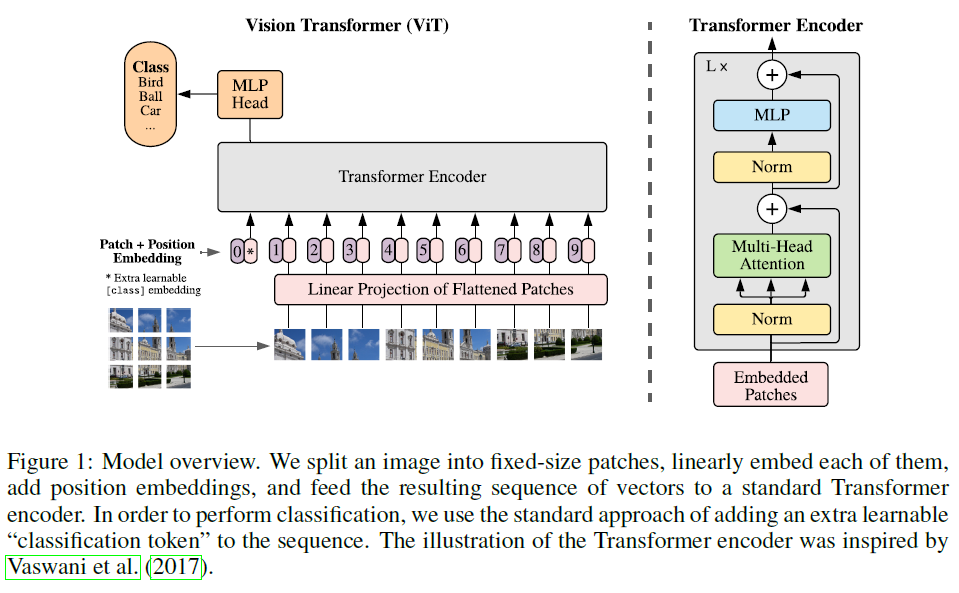

In [10]:
import torch
from torch import nn

from einops import rearrange, repeat
from einops.layers.torch import Rearrange

def pair(t):
    return t if isinstance(t, tuple) else (t, t)

class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn
    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )
    def forward(self, x):
        return self.net(x)

class Attention(nn.Module):
    def __init__(self, dim, heads = 8, dropout = 0.):
        super().__init__()
        #d_model = dim_heads * heads

        assert dim % heads == 0

        self.hidden_dim = dim
        self.n_heads = heads
        self.dim_head = dim // heads
        self.scale = self.dim_head ** -0.5

        self.attend = nn.Softmax(dim = -1) #마지막 차원에 대해 softmax 처리
        self.to_qkv = nn.Linear(dim, dim * 3, bias = False)

        self.to_out = nn.Sequential(
            nn.Linear(dim, dim),
            nn.Dropout(dropout),
            nn.Linear(dim, dim),
        )

    def forward(self, x , mask = None):
        qkv = self.to_qkv(x).chunk(3, dim = -1) # q,k,v로 전체 데이터를 3등분 하기 / 그러나 애초에 nn.linear에서 3배를 실행 -> 차원은 그대로
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = self.heads), qkv)

        dots = torch.matmul(q, k.transpose(-1, -2)) * self.scale # scale은 normalize?

        # 마스크(mask)를 사용하는 경우
        if mask is not None:
          # 마스크(mask) 값이 0인 부분을 -1e10으로 채우기
          dots = dots.masked_fill(mask==0, -1e10)

        attn = self.attend(dots)

        out = torch.matmul(attn, v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.to_out(out)

In [11]:
class Enc_Transformer(nn.Module):
    def __init__(self, dim, n_layer, heads, mlp_dim, dropout = 0.):
        super().__init__()
        self.layers = nn.ModuleList([])
        self.dropout = nn.Dropout(dropout)
        self.norm = nn.LayerNorm(dim)
        for _ in range(n_layer):
          # vit 논문 그림 transformer 구현
            self.layers.append(nn.ModuleList([
                Attention(dim, heads = heads, dropout = dropout),
                FeedForward(dim, mlp_dim, dropout = dropout)
            ]))
    def forward(self, x, x_mask):
        for attn, ff in self.layers:
            x = attn(self.norm(x), x_mask) + x #residual network 구현 
            x = self.dropout(x)
            x = ff(self.norm(x)) + x # residual network 구현
            x = self.dropout(x)
        return x


In [12]:
class ViT(nn.Module):
    def __init__(self, *, image_size, patch_size, dim, n_layer, heads, mlp_dim, channels = 3, dropout = 0., emb_dropout = 0.):
        super().__init__()
        image_height, image_width = pair(image_size)
        patch_height, patch_width = pair(patch_size)

        assert image_height % patch_height == 0 and image_width % patch_width == 0, 'Image dimensions must be divisible by the patch size.'

        num_patches = (image_height // patch_height) * (image_width // patch_width)
        patch_dim = channels * patch_height * patch_width

        self.to_patch_embedding = nn.Sequential(
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = patch_height, p2 = patch_width),
            nn.Linear(patch_dim, dim),
        )

        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches, dim))
        self.dropout = nn.Dropout(emb_dropout)

        self.transformer = Enc_Transformer(dim, n_layer, heads, mlp_dim, dropout)

    def forward(self, img, img_mask):
        x = self.to_patch_embedding(img)
        b, n, _ = x.shape

        x += self.pos_embedding[:, :n]
        x = self.dropout(x)

        x = self.transformer(x, img_mask)

        return x

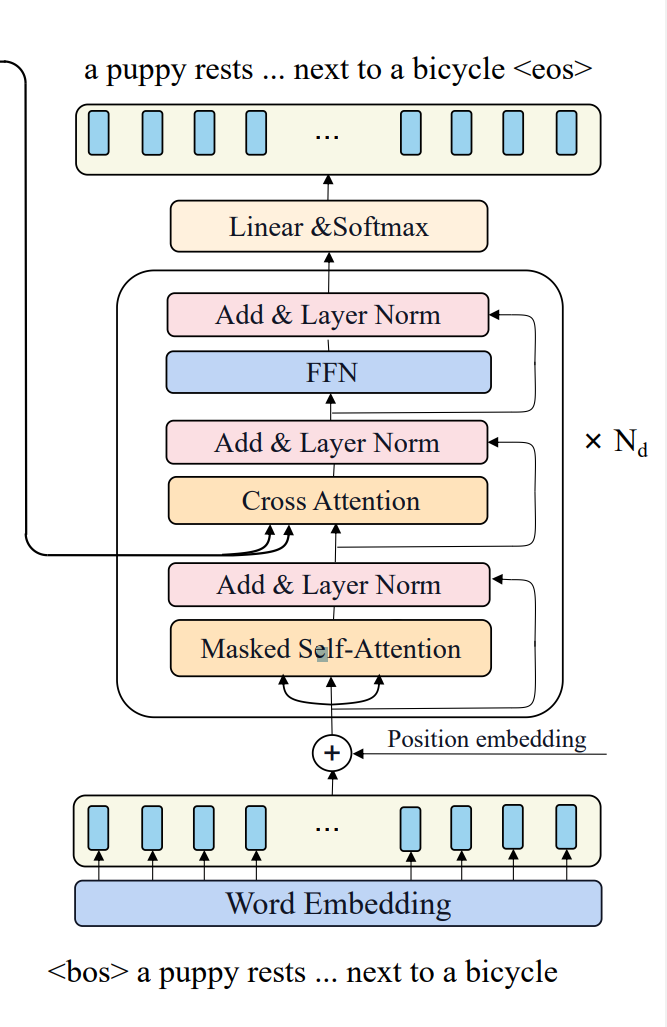

In [13]:
# import math

# class PositionEmbeddingSine(nn.Module):
#     """
#     This is a more standard version of the position embedding, very similar to the one
#     used by the Attention is all you need paper, generalized to work on images.
#     """
#     def __init__(self, num_pos_feats=64, temperature=10000, normalize=False, scale=None):
#         super().__init__()
#         self.num_pos_feats = num_pos_feats
#         self.temperature = temperature
#         self.normalize = normalize
#         if scale is not None and normalize is False:
#             raise ValueError("normalize should be True if scale is passed")
#         if scale is None:
#             scale = 2 * math.pi
#         self.scale = scale

#     def forward(self, tensor_list: NestedTensor):
#         x = tensor_list.tensors
#         mask = tensor_list.mask
#         assert mask is not None
#         not_mask = ~mask
#         y_embed = not_mask.cumsum(1, dtype=torch.float32)
#         x_embed = not_mask.cumsum(2, dtype=torch.float32)
#         if self.normalize:
#             eps = 1e-6
#             y_embed = y_embed / (y_embed[:, -1:, :] + eps) * self.scale
#             x_embed = x_embed / (x_embed[:, :, -1:] + eps) * self.scale

#         dim_t = torch.arange(self.num_pos_feats, dtype=torch.float32, device=x.device)
#         dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)

#         pos_x = x_embed[:, :, :, None] / dim_t
#         pos_y = y_embed[:, :, :, None] / dim_t
#         pos_x = torch.stack((pos_x[:, :, :, 0::2].sin(), pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)
#         pos_y = torch.stack((pos_y[:, :, :, 0::2].sin(), pos_y[:, :, :, 1::2].cos()), dim=4).flatten(3)
#         pos = torch.cat((pos_y, pos_x), dim=3).permute(0, 3, 1, 2)
#         return pos

In [14]:
import torch
from torch import nn

from einops import rearrange, repeat
from einops.layers.torch import Rearrange

def pair(t):
    return t if isinstance(t, tuple) else (t, t)

class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn
    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )
    def forward(self, x):
        return self.net(x)


class Cross_Attention(nn.Module):
      def __init__(self, dim, heads = 8, dropout = 0.):
        super().__init__()
        #d_model = dim_heads * heads
        assert dim % heads == 0

        self.hidden_dim = dim
        self.n_heads = heads
        self.dim_head = dim // heads
        self.scale = self.dim_head ** -0.5

        self.attend = nn.Softmax(dim = -1) #마지막 차원에 대해 softmax 처리
        self.to_kv = nn.Linear(dim, dim * 2, bias = False)
        self.to_q = nn.Linear(dim, dim, bias = False)

        self.to_out = nn.Sequential(
            nn.Linear(dim, dim),
            nn.Dropout(dropout),
            nn.Linear(dim, dim),
        )

      def forward(self, x, memory, mask = None): # memory는 image로 계산된 결과 (key와 value에 할당)

        q = self.to_q(x)
        kv = self.to_kv(memory).chunk(2,dim = -1)

        q = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = self.heads), q)
        k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = self.heads), kv)

        dots = torch.matmul(q, k.transpose(-1, -2)) * self.scale # scale은 normalize?

        if mask is not None:
            dots = dots.masked_fill(mask == 0, -1e10)

        attn = self.attend(dots)

        out = torch.matmul(attn, v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.to_out(out)


In [15]:
class DEC_Transformer(nn.Module):
    def __init__(self, dim, n_layer, heads, mlp_dim, dropout = 0.):
        super().__init__()
        self.layers = nn.ModuleList([])
        self.layer_norm = nn.LayerNorm(dim)
        self.linear = nn.Linear(dim,dim)
        for _ in range(n_layer):
          # vit 논문 그림 transformer 구현
            self.layers.append(nn.ModuleList([
                Attention(dim, heads = heads, dropout = dropout),
                Cross_Attention(dim, heads = heads, dropout = dropout),
                FeedForward(dim, mlp_dim, dropout = dropout)
            ]))
    def forward(self, x, src, x_mask, src_mask):
        for attn, cross_attn, ff in self.layers:
            x = attn(x, x_mask) + x # residual network 구현
            x = self.layer_norm(x)
            x = cross_attn(x, src, src_mask) + x # residual network 구현
            x = self.layer_norm(x) 
            x = ff(x) + x # residual network 구현
            x = self.layer_norm(x)
            x = self.linear(x)
        return x

In [16]:
class Dec_Transformer_Model(nn.Module):
    def __init__(self, *, output_dim, dim, max_length = 100, n_layer, heads, mlp_dim, channels = 3, dropout = 0., emb_dropout = 0.):
        super().__init__()
        self.tok_embedding = nn.Embedding(output_dim,dim)
        self.pos_embedding = nn.Embedding(max_length, dim)
        self.max_length = max_length
        self.dropout = nn.Dropout(emb_dropout)
        self.scale = torch.sqrt(torch.FloatTensor([dim]))
        self.layers = DEC_Transformer(dim, n_layer, heads, mlp_dim, dropout)
        self.linear = nn.Linear(dim,output_dim)

    def forward(self, x, src, x_mask, src_mask):
        b, n = x.shape
        pos = torch.arange(0, n).unsqueeze(0).repeat(b, 1)
        x = (self.tok_embedding(x) * self.scale) + self.pos_embedding(pos)#* self.scale
        x = self.dropout(x)
        x = self.transformer(x, src, x_mask, src_mask)
        x = self.linear(x)
        return x

In [17]:
class Transformer(nn.Module):
    def __init__(self, encoder, decoder, src_pad_idx, trg_pad_idx):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx

    # 소스 문장의 <pad> 토큰에 대하여 마스크(mask) 값을 0으로 설정
    def make_src_mask(self, src):

        # src: [batch_size, src_len]

        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)

        # src_mask: [batch_size, 1, 1, src_len]

        return src_mask

    # 타겟 문장에서 각 단어는 다음 단어가 무엇인지 알 수 없도록(이전 단어만 보도록) 만들기 위해 마스크를 사용
    def make_trg_mask(self, trg):

        # trg: [batch_size, trg_len]

        """ (마스크 예시)
        1 0 0 0 0
        1 1 0 0 0
        1 1 1 0 0
        1 1 1 0 0
        1 1 1 0 0
        """
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)

        # trg_pad_mask: [batch_size, 1, 1, trg_len]

        trg_len = trg.shape[1]

        """ (마스크 예시)
        1 0 0 0 0
        1 1 0 0 0
        1 1 1 0 0
        1 1 1 1 0
        1 1 1 1 1
        """
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len))).bool()

        # trg_sub_mask: [trg_len, trg_len]

        trg_mask = trg_pad_mask & trg_sub_mask

        # trg_mask: [batch_size, 1, trg_len, trg_len]

        return trg_mask

    def forward(self, src, trg):

        # src: [batch_size, src_len]
        # trg: [batch_size, trg_len]

        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)

        # src_mask: [batch_size, 1, 1, src_len]
        # trg_mask: [batch_size, 1, trg_len, trg_len]

        enc_src = self.encoder(src, src_mask)

        # enc_src: [batch_size, src_len, hidden_dim]

        output = self.decoder(trg, enc_src, trg_mask, src_mask)

        # output: [batch_size, trg_len, output_dim]
        # attention: [batch_size, n_heads, trg_len, src_len]

        return output

In [18]:
class Config(object):
    def __init__(self):
      super(Config,self).__init__()
      # Epoch
      self.epochs = 5
      self.lr_drop = 20
      self.start_epoch = 0
      self.weight_decay = 1e-4
      
      # Basic
      self.device = 'cuda'
      self.seed = 42
      self.batch_size = 8
      self.num_workers = 0
      self.checkpoint = './checkpoint.pth'
      self.clip_max_norm = 0.1

      # Transformer
      self.image_size = 256
      self.patch_size = 8
      self.hidden_dim = 224
      self.pad_token_id = 0
      self.max_position_embeddings = 100
      self.layer_norm_eps = 1e-12
      self.dropout = 0.1
      self.vocab_size = len(vocab)

      self.enc_layers = 3
      self.dec_layers = 3
      self.dim_feedforward = 512
      self.nheads = 4
      self.pre_norm = True

      # Dec Transformer
      self.output_dim = 24

      # Dataset
      self.dir = '../Flickr'
      self.limit = -1

In [19]:
# 모델 객체 선언
config = Config()

log_step = 20 # 로그를 출력할 스텝(step)
save_step = 1000 # 학습된 모델을 저장할 스텝(step)

encoder = ViT(image_size = config.image_size, 
          patch_size = config.patch_size, 
          dim = config.hidden_dim, 
          n_layer = config.enc_layers,
          mlp_dim = config.dim_feedforward,
          dropout = config.dropout,
          emb_dropout = config.dropout)

decoder = Dec_Transformer_Model(output_dim = len(vocab) ,
          dim = config.hidden_dim,            
          max_length = config.max_position_embeddings,  
          n_layer = config.dec_layers,
          mlp_dim = config.dim_feedforward,
          dropout = config.dropout,
          emb_dropout = config.dropout)

src_pad_idx = trg_pad_idx = 0

model = Transformer(encoder,decoder,src_pad_idx,trg_pad_idx)

def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

#모델 가중치 parameter 초기화 
model.apply(initialize_weights)

# 손실(loss) 및 최적화 함수 선언
learning_rate = 0.001
num_epochs = config.epochs
criterion = nn.CrossEntropyLoss(ignore_index = trg_pad_idx)
params = model.parameters()
optimizer = torch.optim.Adam(params,lr=learning_rate)

TypeError: ignored

In [ ]:
# train_transform = transforms.Compose([ 
#     transforms.RandomCrop(crop_size),
#     transforms.RandomHorizontalFlip(), 
#     transforms.ToTensor(), 
#     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

# path = '/content/resized_train/images/1000268201_693b08cb0e.jpg'
# image = Image.open(os.path.join(path)).convert('RGB')
# image = train_transform(image)
# image = image.unsqueeze(0)
# print(image.shape)
# preds = vit(image)
# print(preds)
# print(preds.shape)

In [ ]:
import time
import numpy as np

start_time = time.time() # 전체 학습 시간 측정

# 모델 학습 진행
for epoch in range(num_epochs):

    # 먼저 학습 진행하기
    print("[ Training ]")
    total_loss = 0
    total_count = 0
    total_step = len(train_data_loader)

    for i, (images, captions, lengths) in enumerate(train_data_loader):
        images = images.to(device)
        captions = captions.to(device)

        optimizer.zero_grad()
        # 순전파(forward), 역전파(backward) 및 학습 진행
        outputs = model(images,captions).to(device)
        output_dim = outputs.shape[-1]

        output = output.contiguous().view(-1,output_dim)
        captions = captions[:,1,:].contiguous().view(-1)
        loss = criterion(outputs, captions)
        loss.backward()

        optimizer.step()

        # 손실(loss) 값 계산
        total_loss += loss.item()
        total_count += images.shape[0]

        # 로그(log) 정보 출력
        if i % log_step == 0:
            print('Epoch [{}/{}], Step [{}/{}], Average Loss: {:.4f}, Perplexity: {:5.4f}, Elapsed time: {:.4f}s'
                  .format(epoch, num_epochs, i, total_step, total_loss / total_count, np.exp(loss.item()), time.time() - start_time))

    # 모델 파일 저장하기
    torch.save(model.state_dict(), os.path.join(model_path, f'model-{epoch + 1}.ckpt'))
    print(f"Model saved: {os.path.join(model_path, f'decoder-{epoch + 1}.ckpt')}")

    # 학습 이후에 평가 진행하기
    print("[ Validation ]")
    total_loss = 0
    total_count = 0
    total_step = len(val_data_loader)
    with torch.no_grad():
        for i, (images, captions, lengths) in enumerate(val_data_loader):
            images = images.to(device)
            captions = captions.to(device)

            # 순전파(forward) 진행
            outputs = model(images,captions[:,:,-1])

            output_dim = output.shape[-1]

            output = output.contiguous().view(-1,output_dim)

            captions = captions[:,1,:].contiguous.view(-1)

            loss = criterion(outputs, captions)
  
            # 손실(loss) 값 계산
            total_loss += loss.item()
            total_count += images.shape[0]

            # 로그(log) 정보 출력
            if i % log_step == 0:
                print('Epoch [{}/{}], Step [{}/{}], Average Loss: {:.4f}, Perplexity: {:5.4f}, Elapsed time: {:.4f}s'
                      .format(epoch, num_epochs, i, total_step, total_loss / total_count, np.exp(loss.item()), time.time() - start_time))